
=== FEATURE 1: Randomly Sample eccentricities for GC BBH Megers (10Hz) and plot CDF ===
Example output (eccentricites of LIGO mergers): [0.00023389 0.00551002 0.00014543]


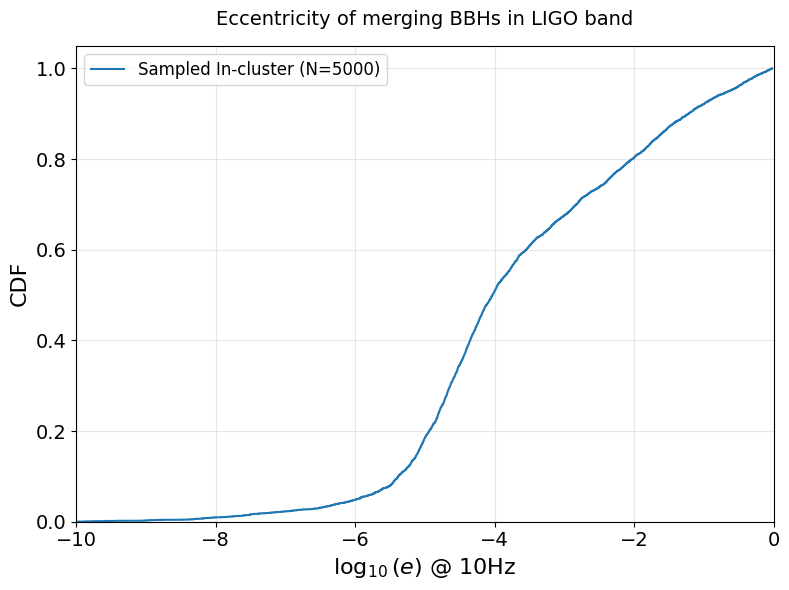

In [19]:
"""
Tutorial: Binary Black Hole Populations in Milky Way Globular Clusters
============================================================================

This script demonstrates how to use the 'GC_BBH' module to analyze
BBH populations formed in globular clusters (GCs). It provides access to data
derived from cluster Monte Carlo (CMC) simulations.

Key Features:
1. LIGO Band (10 Hz): Generate eccentricity samples for merging BBHs, categorized
   by formation channels (e.g., In-cluster, Ejected, 3-body capture).
2. LISA Band (mHz): Generate and Visualize spatial and orbital parameter distributions (SMA,
   Eccentricity, SNR) of BBH progenitors currently existing in MW GCs.

References:
- Eccentricity Distributions: Zevin et al. (2020), ApJ 903 67
- MW GC Populations: Kremer et al. (2020), ApJS 247 48; Xuan et al. (2024), ApJL 985 L42
============================================================================
"""

from GC_modeling import GC_BBH

# FEATURE 1: Randomly Sample eccentricities for Globular Cluster BBH Megers in LIGO band (10Hz) and plot CDF
# Ref: Zevin et al. (2020) [ApJ 903 67]
# Main categories: 'Incluster', 'Ejected'
# Sub-categories:  'Incluster Binary', 'Non-KL Triple', 'KL Triple', 'Single Capture', 'Fewbody Capture'
print("\n=== FEATURE 1: Randomly Sample eccentricities for GC BBH Megers (10Hz) and plot CDF ===")
N=5000
e_samples = GC_BBH.generate_ecc_samples_10Hz(channel_name='Incluster', size=N)
print('Example output (eccentricites of LIGO mergers):',e_samples[:3])
GC_BBH.plot_ecc_cdf(e_samples, label="Sampled In-cluster")


=== FEATURE 2: Get BBH parameters from Milky Way Globular Cluster snapshots (MC N-body simulations) ===
Total BBH systems in 10 MW GC realizations: 2325
Example system parameters: ['ngc104', 4.1, 0.011020274, 0.28034861, 13.537008, 15.995417, 119.546275535995]

[NOTE] Statistical Sampling Constraint:
The Monte Carlo N-body catalog has a finite size (N ~ 230 systems per MW realization).
Sampling sizes significantly exceeding the catalog limit will involve resampling,
leading to a loss of statistical independence and overlapping data points in plots.


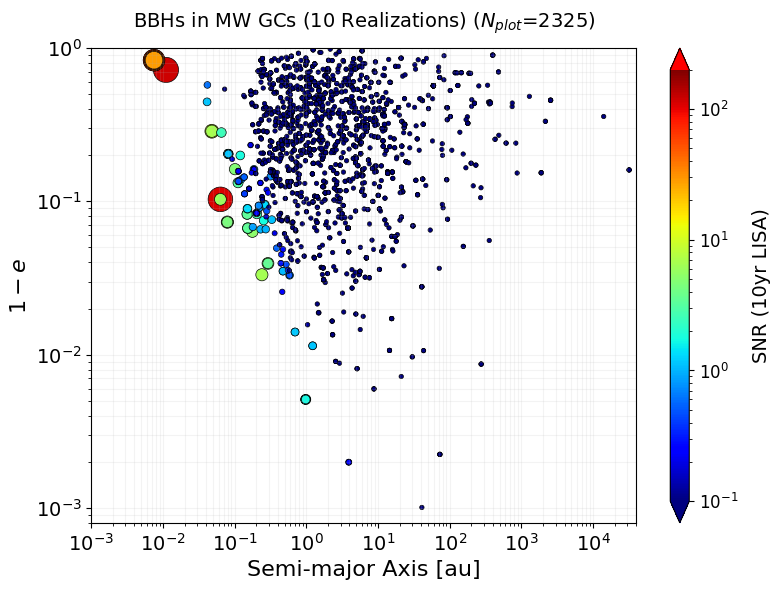

In [20]:
# FEATURE 2: Get BBH parameters from Milky Way Globular Cluster snapshots (Monte Carlo N-body simulations)
# Refs: Xuan et al. (2024) [ApJL 985 L42], Kremer et al. (2020) [ApJS 247 48]
# Note: The snapshots are dominated by quiescent, long-lived population (ideal for LISA analysis).
# LIGO merger populations with high eccentricity rarely appear in a single snapshot due to their short lifetime.

print("\n=== FEATURE 2: Get BBH parameters from Milky Way Globular Cluster snapshots (MC N-body simulations) ===")
# Dataset: 10 realizations of the MW GC BBH population.
# Data Structure:
# [0] Host GC name (str)
# [1] Heliocentric distance [kpc]
# [2] Semi-major axis (a) [au]
# [3] Eccentricity (e)
# [4] Primary mass (m1) [M_sun]
# [5] Secondary mass (m2) [M_sun]
# [6] Sky-averaged SNR (10yr LISA observation)

all_data = GC_BBH.get_full_10_realizations()

print(f"Total BBH systems in 10 MW GC realizations: {len(all_data)}")
print(f"Example system parameters: {all_data[0]}")
print("\n[NOTE] Statistical Sampling Constraint:")
print("The Monte Carlo N-body catalog has a finite size (N ~ 230 systems per MW realization).")
print("Sampling sizes significantly exceeding the catalog limit will involve resampling,")
print("leading to a loss of statistical independence and overlapping data points in plots.")
GC_BBH.plot_mw_gc_bbh_snapshot(all_data, title="BBHs in MW GCs (10 Realizations)")


=== FEATURE 2.1: Randomly sample one Milky Way realization ===


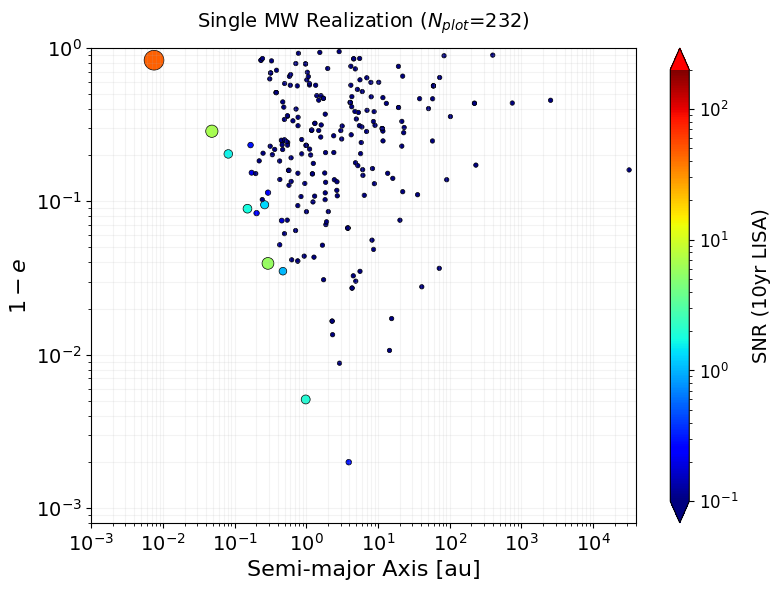


=== FEATURE 2.2: Sample an arbitrary number of BBH systems in MW GCs ===


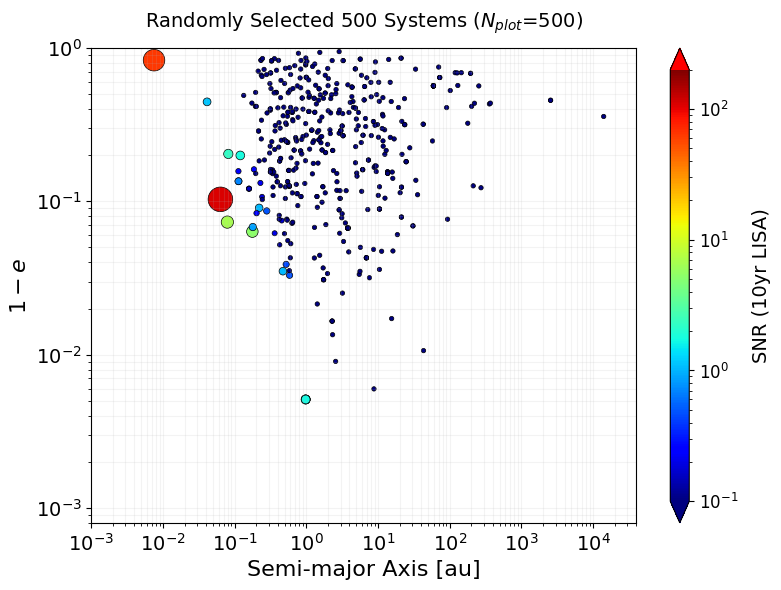

In [48]:
# Feature 2.1: Randomly sample one Milky Way realization
print("\n=== FEATURE 2.1: Randomly sample one Milky Way realization ===")
single_mw = GC_BBH.get_single_mw_realization()
GC_BBH.plot_mw_gc_bbh_snapshot(single_mw, title="Single MW Realization")

# FEATURE 2.2: Sample an arbitrary number of BBH systems in MW GCs (e.g., n=500)
# Note: Since the underlying MC N-body catalog has limited size (N ~ 2300),
# samples exceeding ~200 total will lack statistical independence and have points overlapping with each other.
print("\n=== FEATURE 2.2: Sample an arbitrary number of BBH systems in MW GCs ===")
random_500 = GC_BBH.get_random_systems(500)
GC_BBH.plot_mw_gc_bbh_snapshot(random_500, title="Randomly Selected 500 Systems")